## Human Activity Recognition with Smartphone

Dataset link : 
     https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones


#### Description: 
                 The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

           The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities

1.WALKING

2.WALKING UPSTAIRS

3.WALKING DOWNSTAIRS

4.SITTING

5.STANDING

6.LAYING

   wearing a smartphone (Samsung Galaxy S II) on the waist.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv(r"F:\Priyanaka\train.csv")
test_df=pd.read_csv(r"F:\Priyanaka\test.csv")

In [3]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
test_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
print(train_df.isnull().values.sum())
print(test_df.isnull().values.sum())

0
0


### we have 0 null values in training and testing dataset

In [9]:
df = pd.concat([train_df , test_df])
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis = 1)

In [10]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
print(train_df.shape)
print(test_df.shape)
print(df.shape)

(7352, 563)
(2947, 563)
(10299, 563)


In [12]:
print(df.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [13]:
columnNames = list()
columnNames = df.columns
columnNames

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [14]:
b_Chars = ['-', '()','(',')', ',']

In [15]:
newColumnNames = []
for colName in columnNames:
    newColumnName = ''.join(i for i in colName if i not in b_Chars)
    newColumnNames.append(newColumnName)

In [16]:
newColumnNames

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

In [17]:
df.columns = newColumnNames

In [18]:
df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# EDA

C:\Users\cool\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Activity', ylabel='count'>

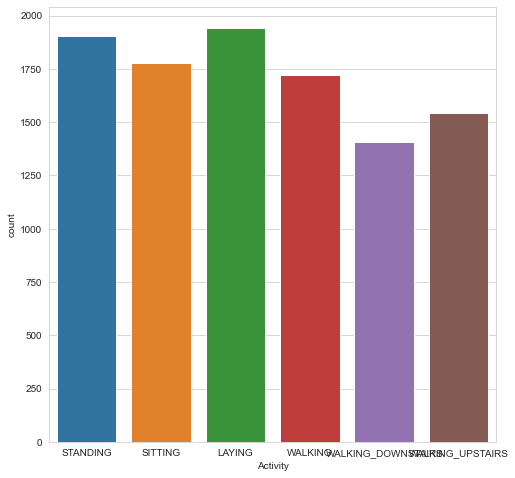

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.countplot('Activity',data =df)

## Our dataset is balenced because all activities almost in an equal level

<AxesSubplot:title={'center':'Data collected by per person'}, xlabel='subject', ylabel='count'>

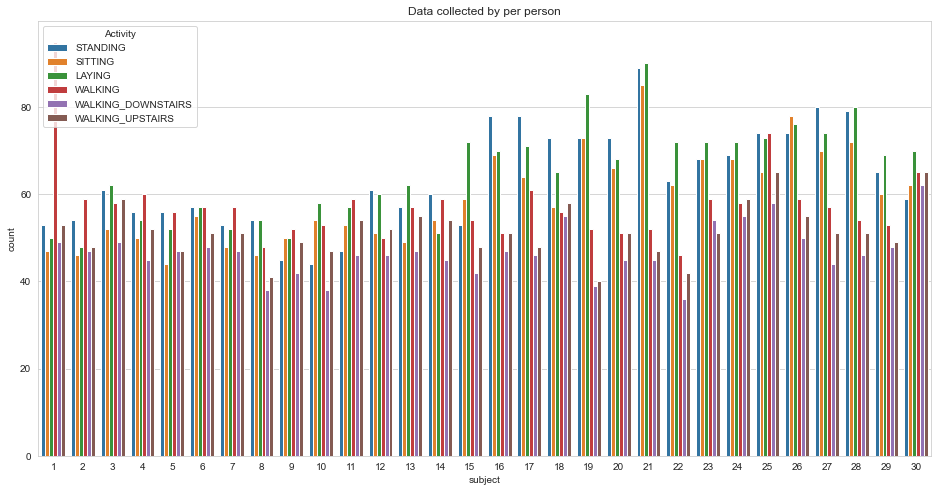

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Data collected by per person')
sns.countplot(x='subject',hue='Activity', data = df)


## Data collected by person are also in same level mean that person did all activities are equal

In [21]:
# select x and y

In [22]:
X = df.drop('Activity',inplace=False, axis = 1)
y = df['Activity']

In [23]:
y = y.map({'STANDING': 0, 'SITTING': 1, 'LAYING': 2, 'WALKING':3,'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5})

In [24]:
y.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [25]:
print(y.shape)
print(X.shape)

(10299,)
(10299, 562)


In [26]:
# # splitting dataset into train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X1,X_test,y1,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size = 0.2, random_state = 0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(6591, 562)
(2060, 562)
(1648, 562)


In [30]:
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)

(6591,)
(2060,)
(1648,)


## Training model

## SVM

In [31]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [32]:
clf_svm_l = svm.SVC(kernel='linear', C=100)
clf_svm_l.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [33]:
y_train_pred_l = clf_svm_l.predict(X_train)
y_test_pred_l = clf_svm_l.predict(X_test)

In [34]:
y_test_pred_l

array([1, 4, 2, ..., 1, 5, 5], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
confusion_matrix(y_test, y_test_pred_l)

array([[375,  15,   0,   0,   0,   0],
       [ 14, 350,   0,   0,   0,   0],
       [  0,   0, 377,   0,   0,   0],
       [  0,   0,   0, 335,   0,   0],
       [  0,   0,   0,   1, 277,   0],
       [  0,   0,   0,   0,   1, 315]], dtype=int64)

In [38]:
accuracy_score(y_test, y_test_pred_l)

0.9849514563106796

In [39]:
### we got 98.49% accuracy in linear karnel

In [40]:
# Grid search in linear karnel

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
params = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000)}

In [43]:
clf_svm_l = svm.SVC(kernel='linear')

In [44]:
svm_grid_lin = GridSearchCV(clf_svm_l, params, n_jobs=-1,
                            cv=10, verbose=1, scoring='accuracy')

In [45]:
svm_grid_lin.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  5.4min finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [46]:
svm_grid_lin.best_params_

{'C': 10}

In [47]:
linsvm_clf = svm_grid_lin.best_estimator_

In [48]:
accuracy_score(y_test, linsvm_clf.predict(X_test))

0.9849514563106796

In [51]:
## Using Grid search we got c = 10 is a best distance and 98.49% accuracy

### Radial

In [49]:
clf_svm_r = svm.SVC(kernel='rbf', gamma=0.5, C=10)
clf_svm_r.fit(X_train, y_train)

SVC(C=10, gamma=0.5)

In [50]:
y_train_pred_r = clf_svm_r.predict(X_train)
y_test_pred_r = clf_svm_r.predict(X_test)

In [52]:
accuracy_score(y_test, y_test_pred_r)

0.491747572815534

In [53]:
clf_svm_r.n_support_

array([1231, 1136, 1250, 1099,  889,  986])

In [54]:
# radial grid

In [55]:
params = {'C':(0.01,0.05, 0.1, 0.5, 1, 5, 10, 50), 
          'gamma':(0.001, 0.01, 0.1, 0.5, 1)}

In [56]:
clf_svm_r = svm.SVC(kernel='rbf')
svm_grid_rad = GridSearchCV(clf_svm_r, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')
svm_grid_rad.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 27.7min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [57]:
svm_grid_rad.best_params_

{'C': 50, 'gamma': 0.01}

In [58]:
radsvm_clf = svm_grid_rad.best_estimator_

In [59]:
accuracy_score(y_test, radsvm_clf.predict(X_test))

0.9936893203883496

### In SVM radial karnel , with out using grid search we got 49% accuracy and using grid search we got 99.36%             accuracy and best distance C =50 and gamma = 0.01


In [60]:
# Polynomial

In [61]:
clf_svm_p3 = svm.SVC(kernel='poly', degree=2, C=0.1)
clf_svm_p3.fit(X_train, y_train)

SVC(C=0.1, degree=2, kernel='poly')

In [62]:
y_train_pred_p = clf_svm_p3.predict(X_train)
y_test_pred_p = clf_svm_p3.predict(X_test)

In [63]:
accuracy_score(y_test,y_test_pred_p)

0.8567961165048543

In [64]:
clf_svm_p3.n_support_

array([1090, 1096,  549,  987,  755,  870])

### In polynomial karnel we got 85.67% accuracy

## KNN

In [65]:
# Feacture scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [67]:
X

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
         3.82007658e-01, -1.61505480e-02, -1.74525187e+00],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
         3.83147865e-01, -1.20627169e-04, -1.74525187e+00],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
         3.84288531e-01,  1.92144041e-02, -1.74525187e+00],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
         6.91509049e-01,  8.75719123e-01,  9.04931324e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
         6.59762215e-01,  8.99444350e-01,  9.04931324e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
         6.56994458e-01,  9.01454465e-01,  9.04931324e-01]])

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
#model building
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred_k = model.predict(X_test)

In [71]:
#model evaluation
confusion_matrix(y_test,y_pred_k)

array([[370,  20,   0,   0,   0,   0],
       [ 32, 331,   1,   0,   0,   0],
       [  1,   0, 376,   0,   0,   0],
       [  0,   0,   0, 334,   0,   1],
       [  0,   0,   0,   5, 270,   3],
       [  0,   0,   0,   1,   0, 315]], dtype=int64)

In [73]:
accuracy_score(y_test,y_pred_k)

0.9689320388349515

## In KNN , we got 96.89% accuracy 

## Final Accuracy



Classification                            Accuracy


SVM
 Linear                                  98.49%
 Linear(grid)                            98.49%
 Radial                                  49.17%
 Radial(grid)                            99.36%
 Polynomial                              85.67%   

KNN                                      96.89%